# [EDA+Modeling] 🏫Online Education Adaptability

In [1]:
# data processing 
import numpy as np 
import pandas as pd 
import pandas.api.types

# visualization 
import matplotlib.pyplot as plt 
plt.rcParams['figure.dpi'] = 200 
import seaborn as sns 

# statistics 
import math 
import scipy
from scipy import stats 

# file Path 
import os 
for dirname, _, filenames in os.walk('/kaggle/input'): 
    for filename in filenames: 
        print(os.path.join(dirname, filename))

/kaggle/input/students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv


In [2]:
# version check
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scipy version: {scipy.__version__}")

# ignore warning
import warnings
warnings.filterwarnings("ignore")

# basic setting
path_root = "/kaggle/input/"
seed = 394
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.12.2
scipy version: 1.13.1


# 1. Overview

In [3]:
# load data
df_raw = pd.read_csv(path_root + "students-adaptability-level-in-online-education/students_adaptability_level_online_education.csv")
print("Raw shape:",df_raw.shape)

Raw shape: (1205, 14)


In [4]:
# quick overview
display(df_raw.head())
display(df_raw.tail())

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1204,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate


In [5]:
# name of columns
df_raw.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [6]:
# basic information
df_raw.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 1018.0 KB


In [7]:
# check missing value
df_raw.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [8]:
# unique values
for col in df_raw.columns:
    print(f"{col}:\t{df_raw[col].unique()}")

Gender:	['Boy' 'Girl']
Age:	['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level:	['University' 'College' 'School']
Institution Type:	['Non Government' 'Government']
IT Student:	['No' 'Yes']
Location:	['Yes' 'No']
Load-shedding:	['Low' 'High']
Financial Condition:	['Mid' 'Poor' 'Rich']
Internet Type:	['Wifi' 'Mobile Data']
Network Type:	['4G' '3G' '2G']
Class Duration:	['3-6' '1-3' '0']
Self Lms:	['No' 'Yes']
Device:	['Tab' 'Mobile' 'Computer']
Adaptivity Level:	['Moderate' 'Low' 'High']


In [9]:
# make feature list
list_not_features = ['Adaptivity Level']
list_features = [c for c in df_raw.columns if not c in list_not_features]
list_numeric_features = []
list_categorical_features = []

# classify features
for c in list_features:
    if df_raw[c].dtype == "object":
        list_categorical_features.append(c)
    else:
        list_numeric_features.append(c)

In [10]:
# convert to 'category' type to save memory
df_raw['Adaptivity Level'] = df_raw['Adaptivity Level'].astype('category')
df_raw[list_categorical_features] = df_raw[list_categorical_features].astype('category')

In [11]:
# check
df_raw.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   category
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   category
 5   Location             1205 non-null   category
 6   Load-shedding        1205 non-null   category
 7   Financial Condition  1205 non-null   category
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   category
 10  Class Duration       1205 non-null   category
 11  Self Lms             1205 non-null   category
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   category
dtypes: category(14)
memory usage: 20.4 KB


In [12]:
# reorder target and categories
df_raw['Adaptivity Level'] = df_raw['Adaptivity Level'].cat.reorder_categories(['Low', 'Moderate', 'High'], ordered = True)
df_raw['Age'] = df_raw['Age'].cat.reorder_categories(['1-5', '6-10', '11-15', '16-20', '21-25', '26-30'], ordered = True)
df_raw['Load-shedding'] = df_raw['Load-shedding'].cat.reorder_categories(['Low', 'High'], ordered = True)
df_raw['Financial Condition'] = df_raw['Financial Condition'].cat.reorder_categories(['Poor', 'Mid', 'Rich'], ordered = True)
df_raw['Network Type'] = df_raw['Network Type'].cat.reorder_categories(['2G', '3G', '4G'], ordered = True)
df_raw['Class Duration'] = df_raw['Class Duration'].cat.reorder_categories(['0', '1-3', '3-6'], ordered = True)

# 2. EDA

In [13]:
def visualize_frequency(df_data, col):
    """
    function to perform frequency analysis of categorical features with visualization.
    including a sns.countplot and percentage display.
    """
    # countplot
    plt.figure(figsize = (8, 2), facecolor = "white")
    ax = sns.countplot(data = df_data, y = col, palette = 'colorblind', orient = 'h')

    # calculate percentage and display
    total = len(df_data)
    for p in ax.patches:
        count = p.get_width()
        percentage = f" {(count / total) * 100:.1f}%"
        x = count
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha = 'left', va = 'center', fontsize = 10)

    # extend plot width
    ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
    plt.show()

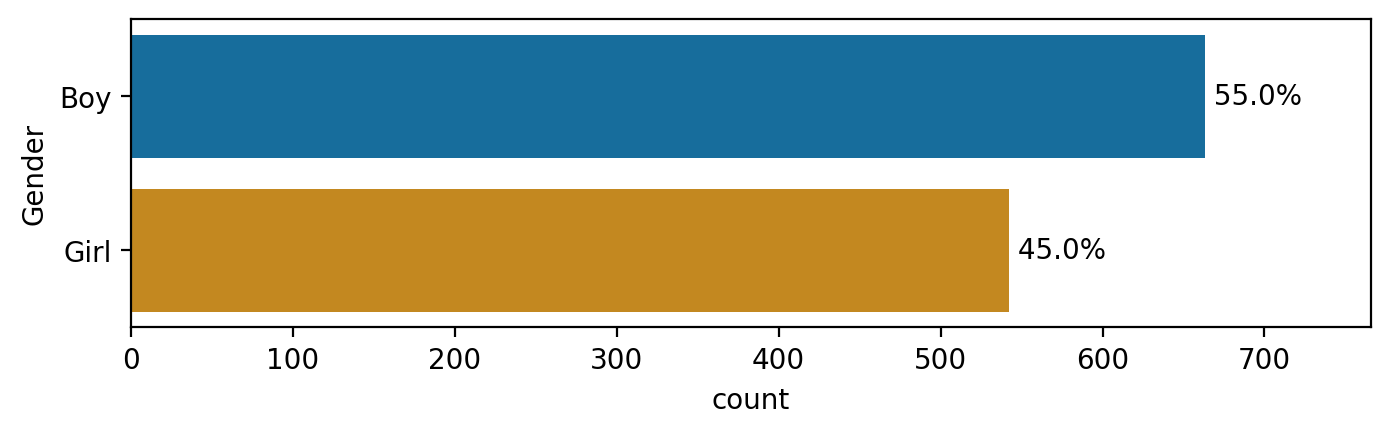

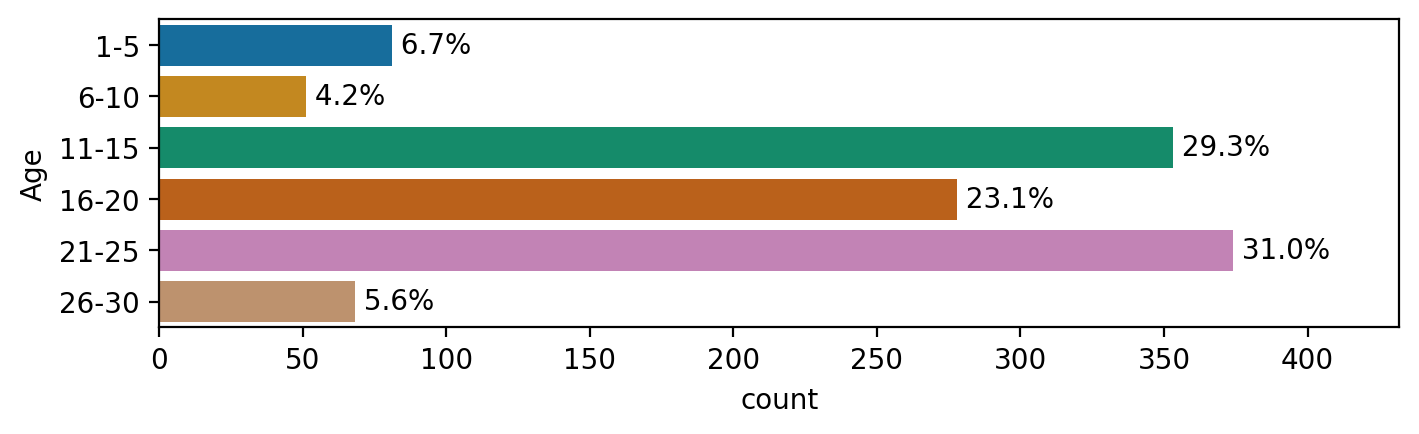

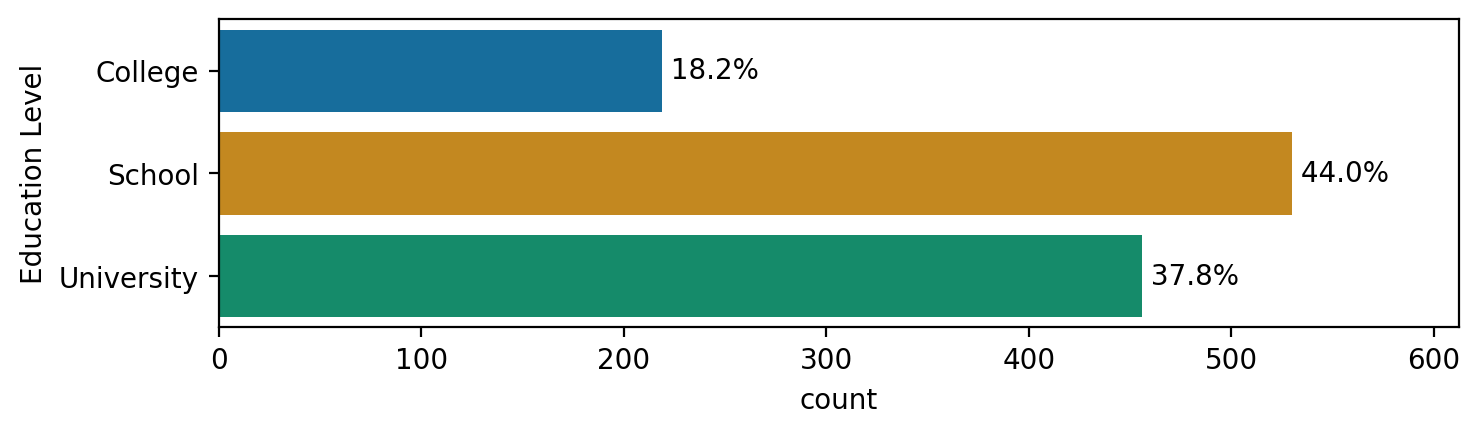

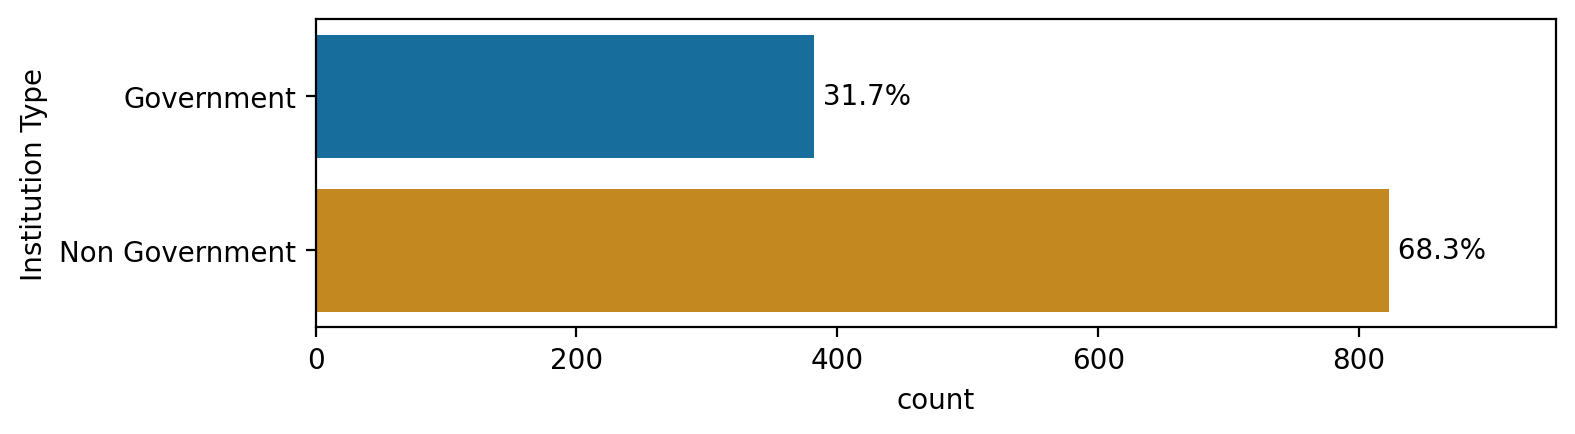

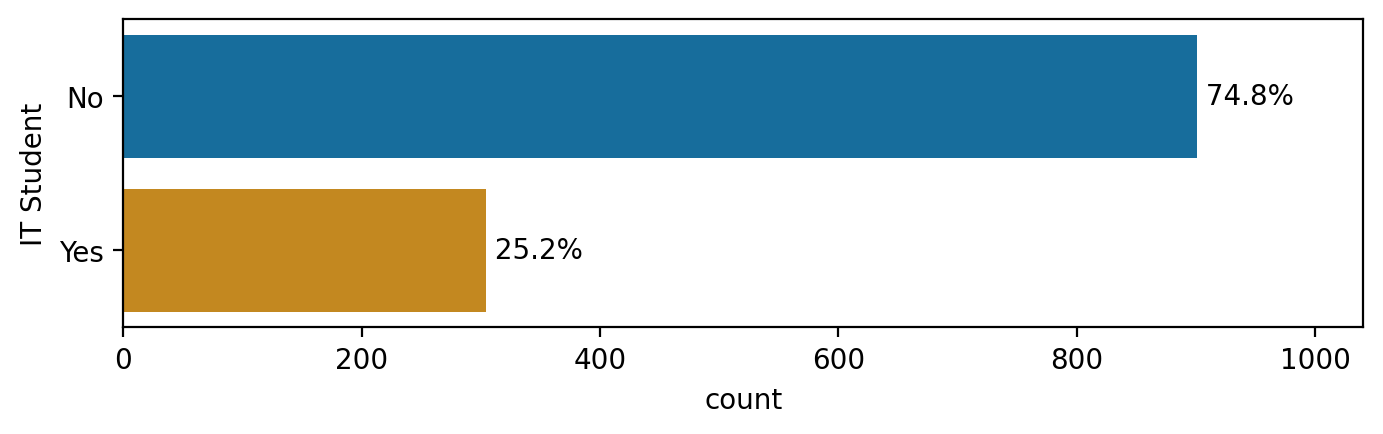

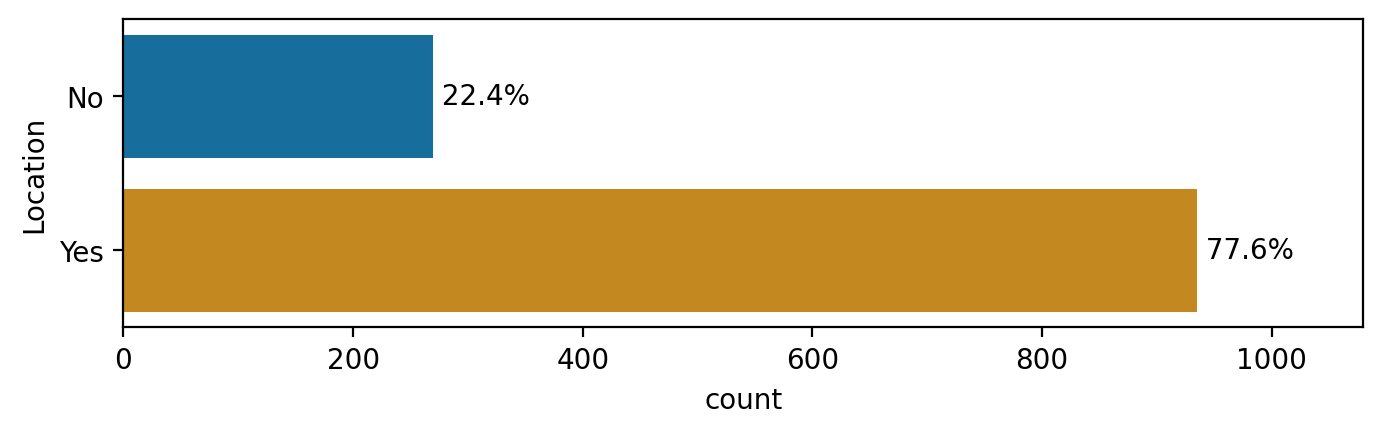

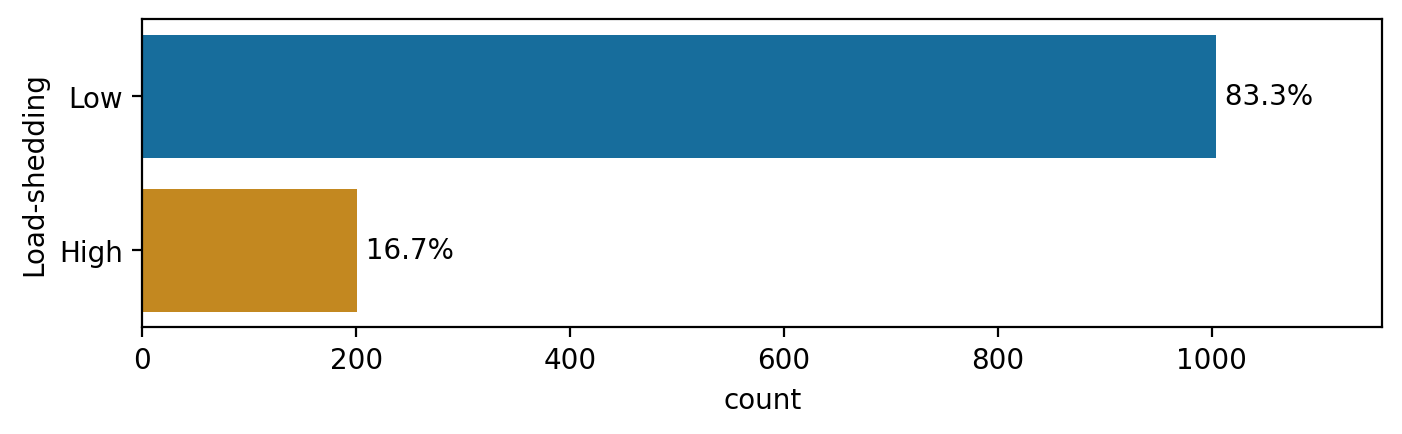

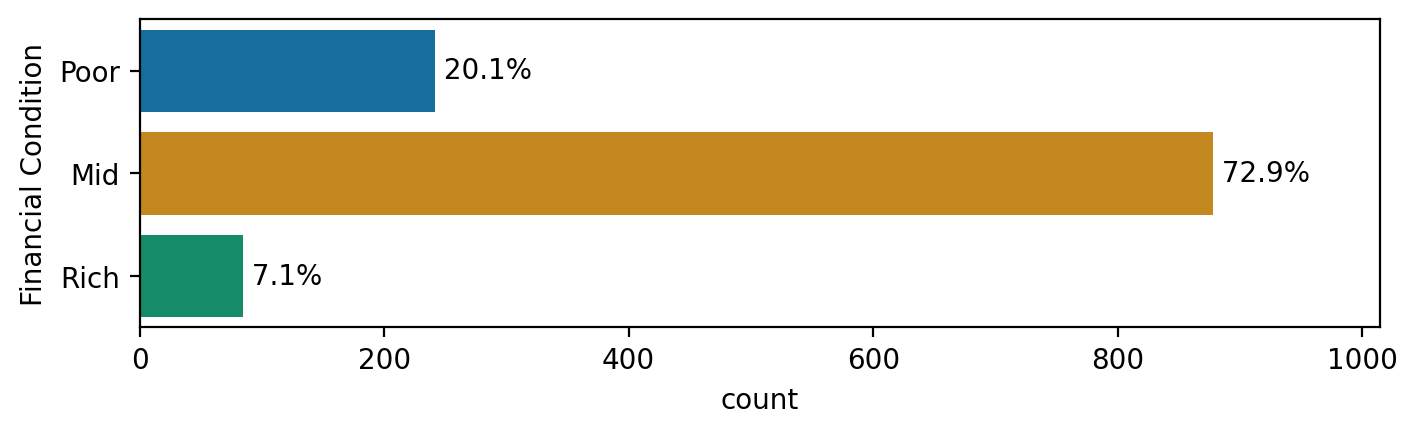

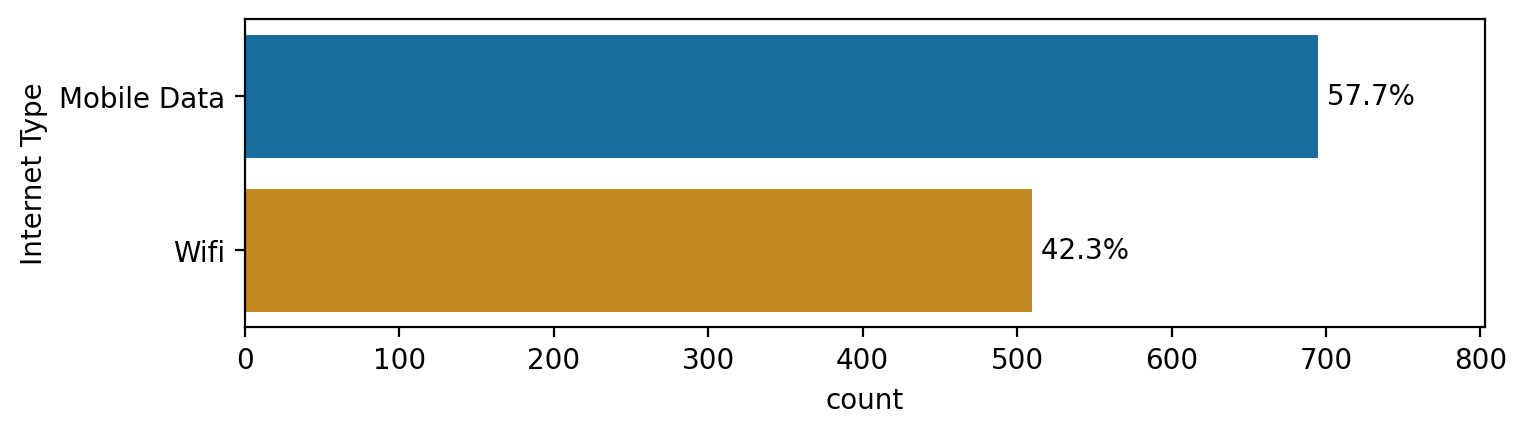

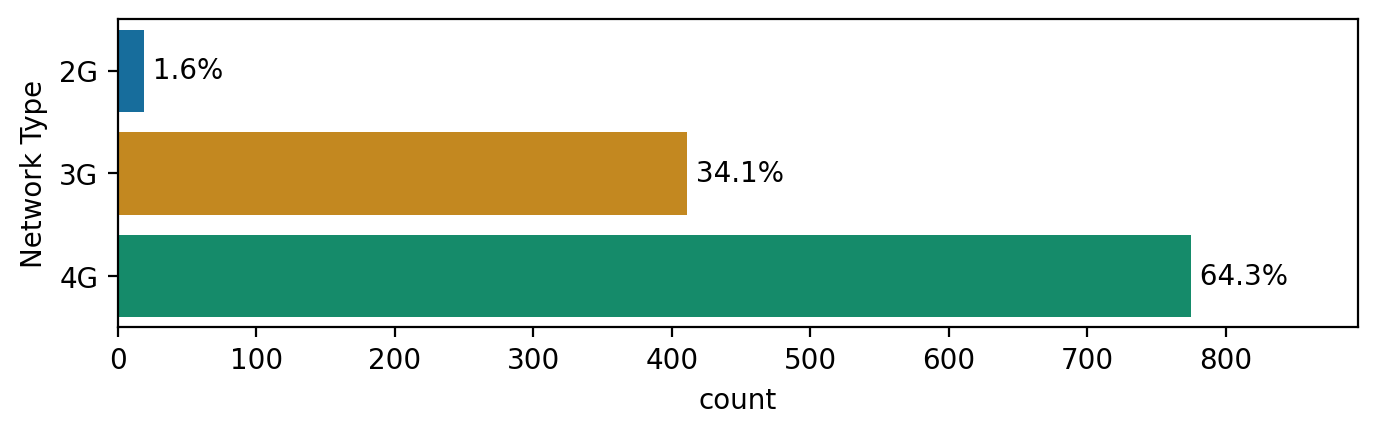

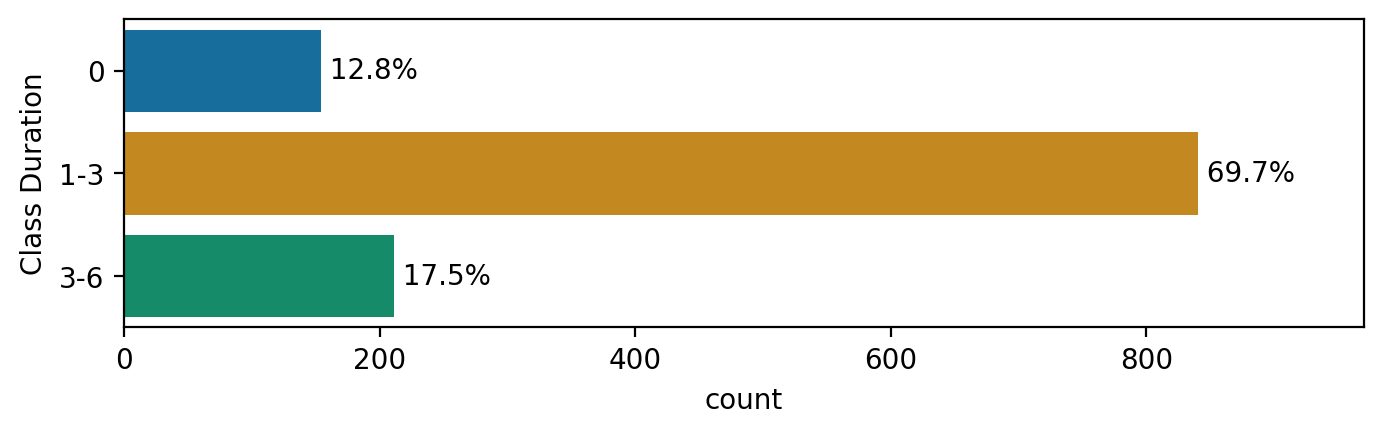

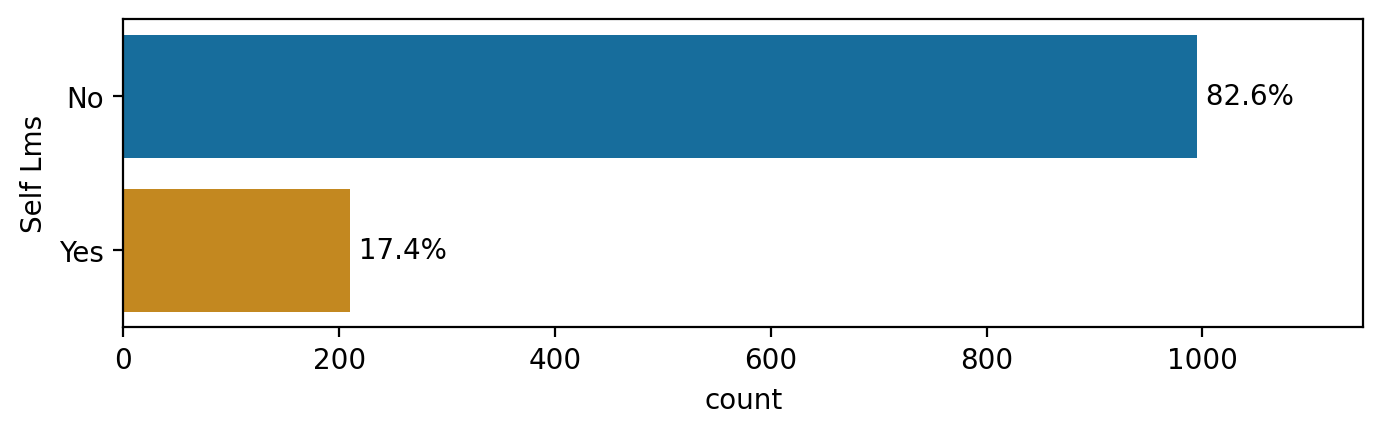

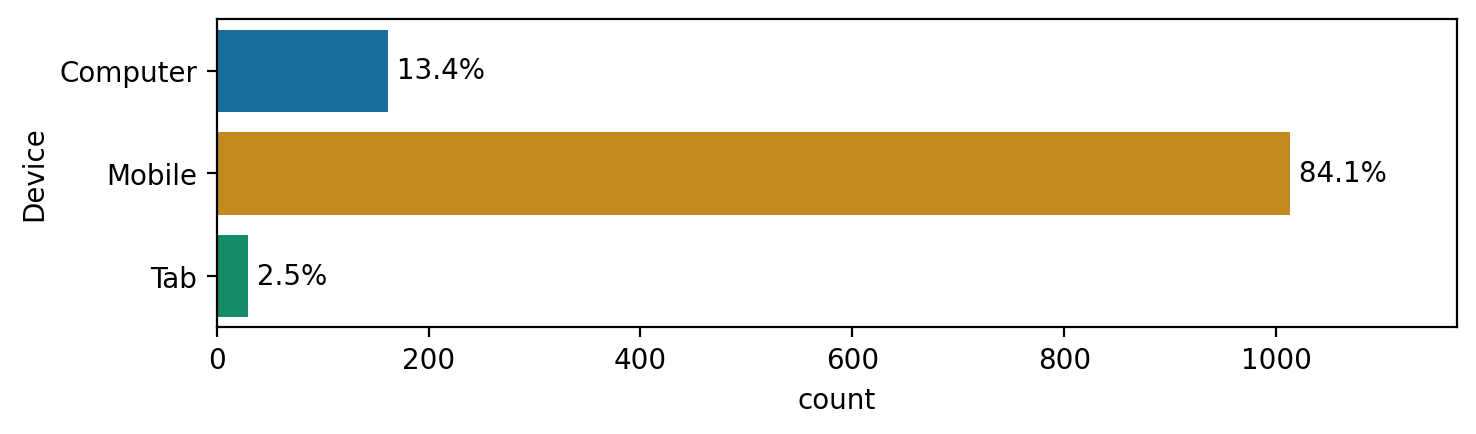

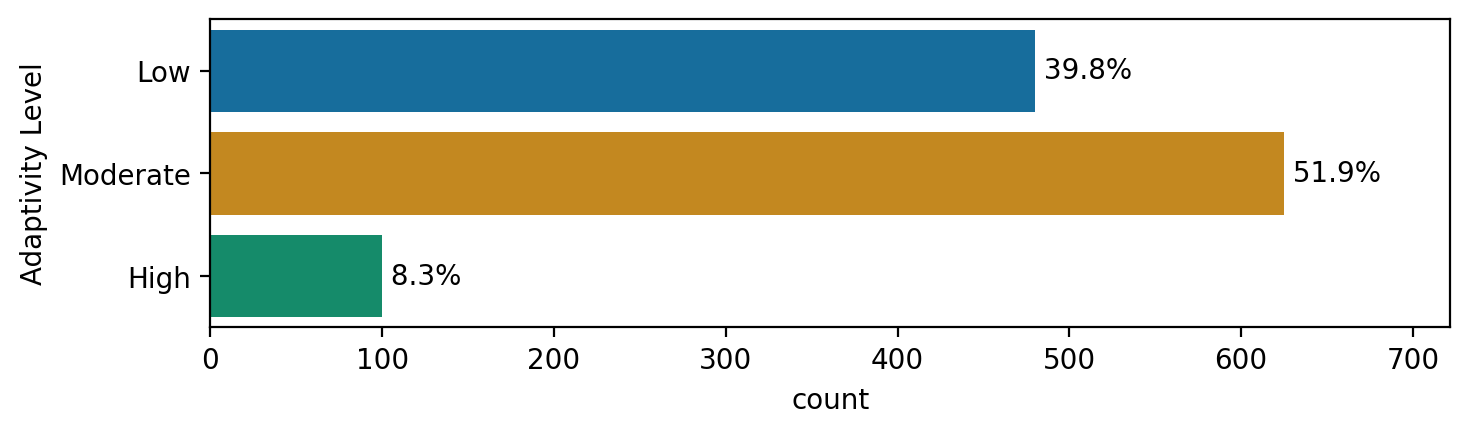

In [14]:
# frequency analysis
for col in df_raw.columns:
    visualize_frequency(df_raw, col)

In [15]:
def visualize_crosstab_and_perform_chi2test(df_data, col_x, col_y):
    """
    function to perform cross-tabulation analysis.
    including a crosstab, heatmap display and chi2 test.
    """
    # make cross table and display
    df_crosstab = pd.crosstab(df_data[col_x], df_data[col_y])
    df_crosstab_normalized = pd.crosstab(df_data[col_x], df_data[col_y], normalize = 'index')
    display(df_crosstab)

    # visualize cross table with heatmap
    plt.figure(figsize = (4, 2), facecolor = "white")
    sns.heatmap(
        data = df_crosstab_normalized, 
        annot = True,
        cmap = 'Blues',
        vmin = 0, vmax = 1,
        fmt = ".2f"
    )
    plt.show()

    # perform chi2 test
    chi2, p, dof, expected = stats.chi2_contingency(df_crosstab)
    print(f"chi2 statistics: {chi2}\np-value: {p:.4f}\ndegree of freedom: {dof}")

Adaptivity Level,Low,Moderate,High
Gender,,,
Boy,245,347,71
Girl,235,278,29


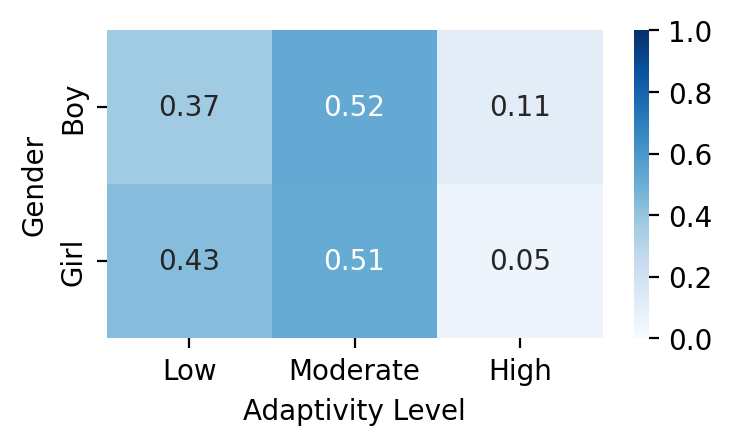

chi2 statistics: 13.4513580562559
p-value: 0.0012
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Age,,,
1-5,17,64,0
6-10,24,10,17
11-15,120,205,28
16-20,144,129,5
21-25,139,197,38
26-30,36,20,12


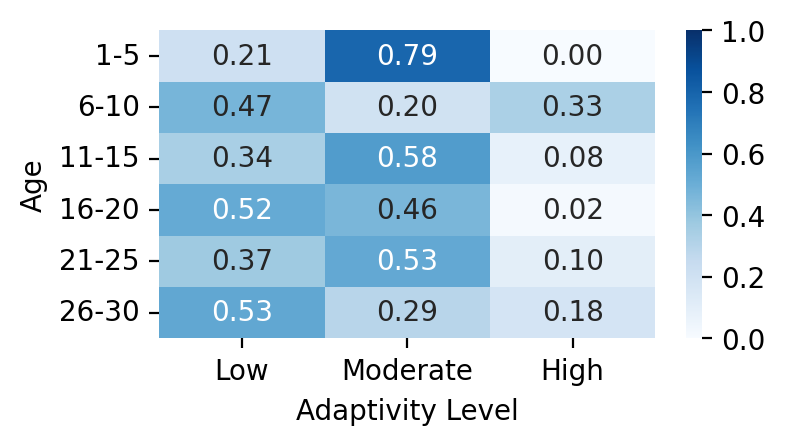

chi2 statistics: 125.29602335570485
p-value: 0.0000
degree of freedom: 10
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Education Level,,,
College,120,96,3
School,182,301,47
University,178,228,50


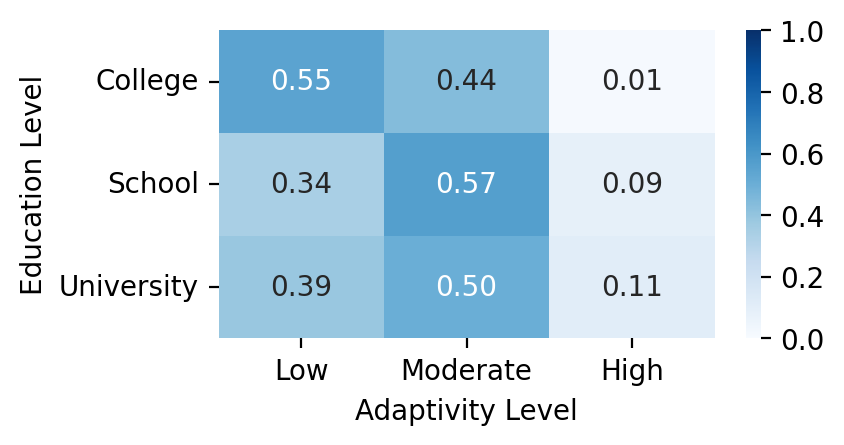

chi2 statistics: 38.685978068323855
p-value: 0.0000
degree of freedom: 4
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Institution Type,,,
Government,234,128,20
Non Government,246,497,80


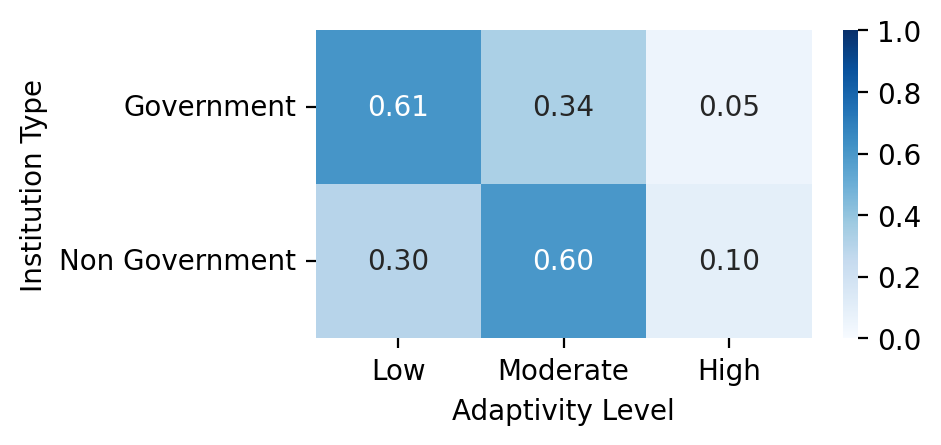

chi2 statistics: 107.10844641618903
p-value: 0.0000
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
IT Student,,,
No,391,443,67
Yes,89,182,33


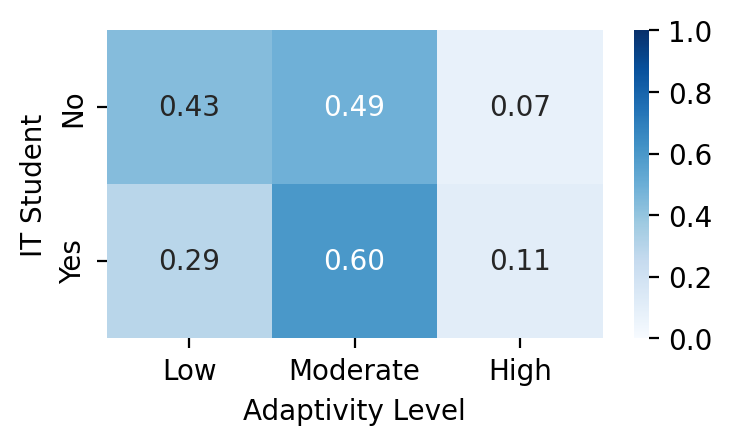

chi2 statistics: 19.59705430400189
p-value: 0.0001
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Location,,,
No,171,91,8
Yes,309,534,92


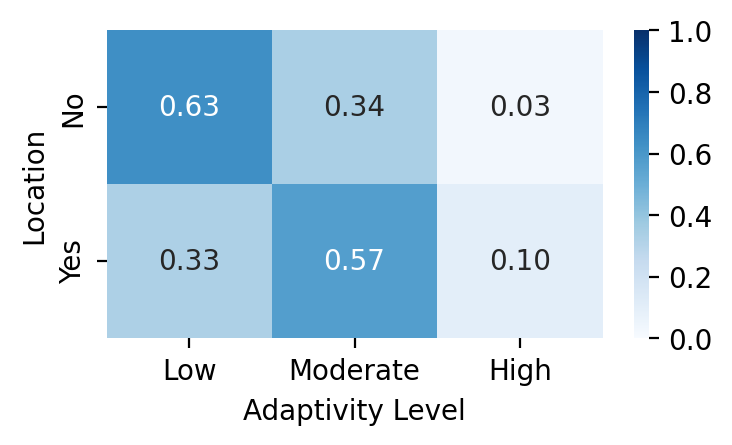

chi2 statistics: 82.30974216181423
p-value: 0.0000
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Load-shedding,,,
Low,380,537,87
High,100,88,13


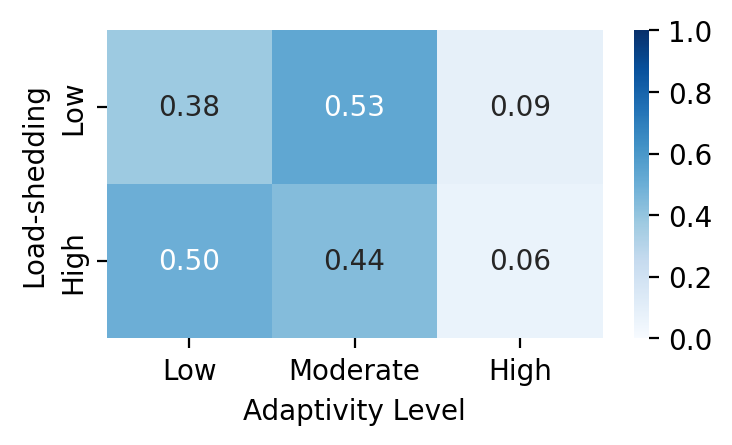

chi2 statistics: 9.972094920483904
p-value: 0.0068
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Financial Condition,,,
Poor,129,91,22
Mid,341,501,36
Rich,10,33,42


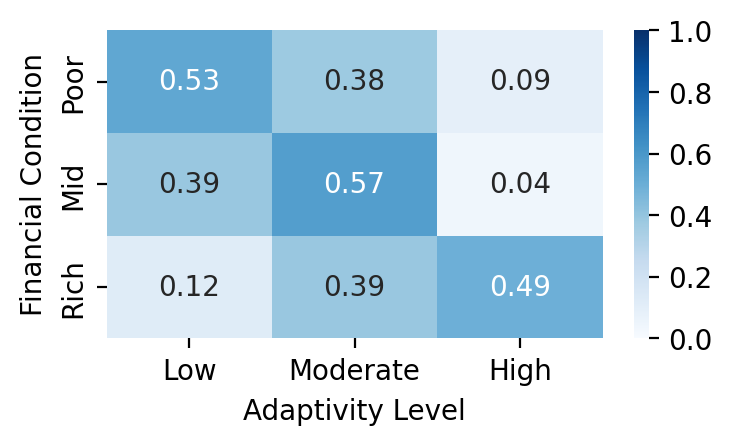

chi2 statistics: 236.86479235811265
p-value: 0.0000
degree of freedom: 4
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Internet Type,,,
Mobile Data,288,371,36
Wifi,192,254,64


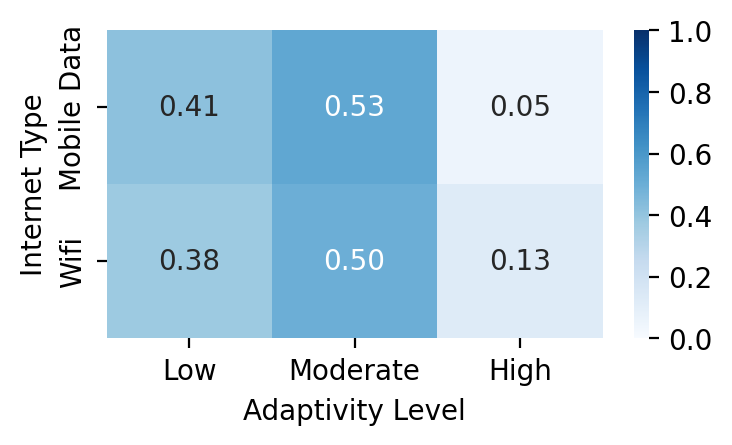

chi2 statistics: 21.03573378473692
p-value: 0.0000
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Network Type,,,
2G,16,3,0
3G,186,203,22
4G,278,419,78


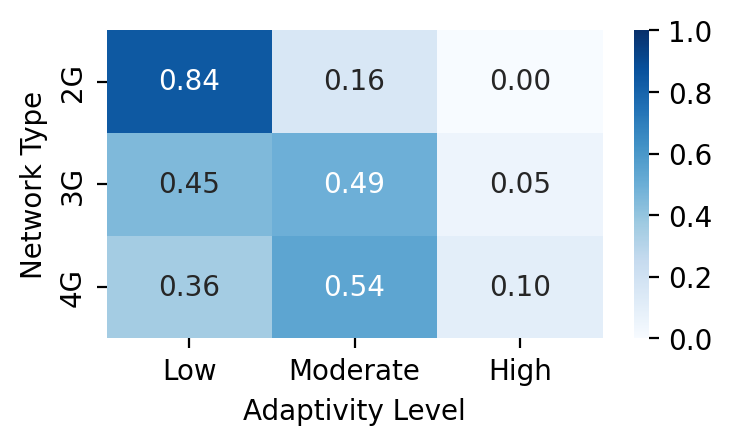

chi2 statistics: 30.243030237567076
p-value: 0.0000
degree of freedom: 4
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Class Duration,,,
0,144,10,0
1-3,290,468,82
3-6,46,147,18


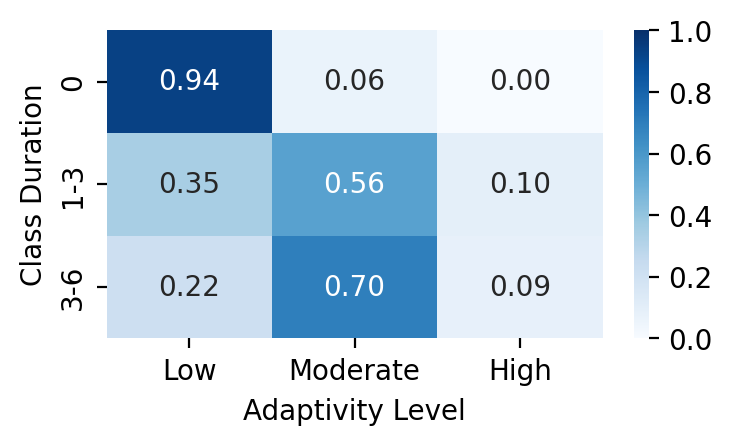

chi2 statistics: 225.9178851994898
p-value: 0.0000
degree of freedom: 4
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Self Lms,,,
No,428,497,70
Yes,52,128,30


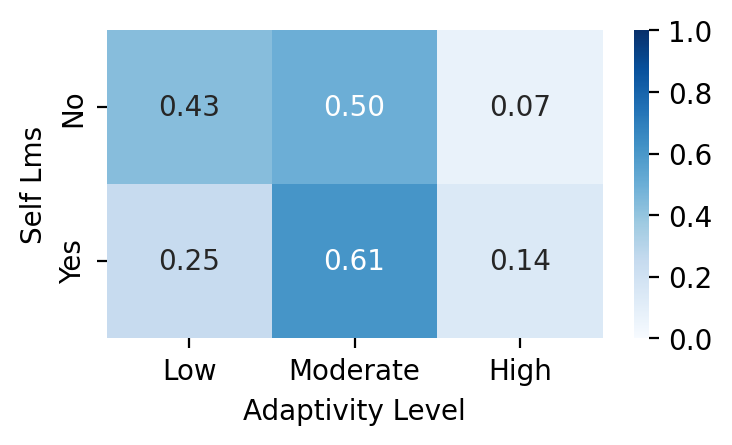

chi2 statistics: 29.53543906835766
p-value: 0.0000
degree of freedom: 2
--------------------------------------------------


Adaptivity Level,Low,Moderate,High
Device,,,
Computer,40,92,30
Mobile,438,507,68
Tab,2,26,2


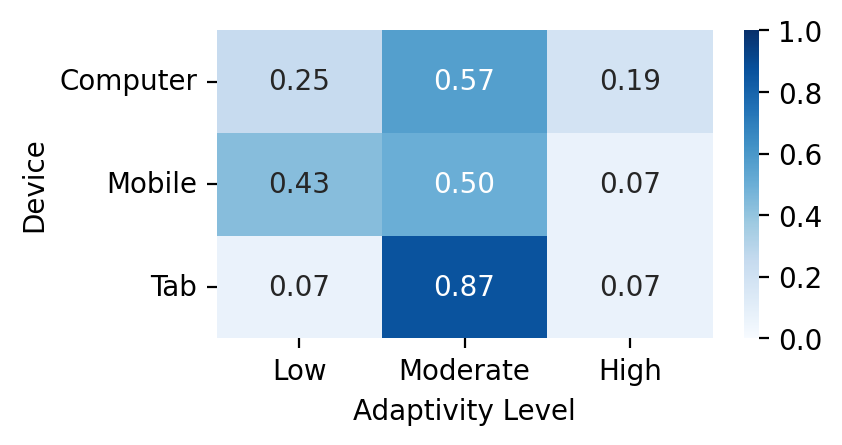

chi2 statistics: 52.518823406416175
p-value: 0.0000
degree of freedom: 4
--------------------------------------------------


In [16]:
# cross-tabulation analysis
for col in df_raw.columns:
    if col in list_not_features:
        continue
    visualize_crosstab_and_perform_chi2test(df_raw, col, 'Adaptivity Level')
    print("-"*50)

# 3. Feature Engineering

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

In [18]:
# split data
# test data ratio: 15%, because size of data is relatively small
df_train, df_test = train_test_split(df_raw, test_size = 0.15, random_state = seed)

In [19]:
# numeric feature: passthrough
numeric_transformer = Pipeline(steps = [
    ('passthrough', 'passthrough')
])

In [20]:
# categorical feature: encoding methods(one-hot, dummy, ordinal)
categorical_transformer_onehot = Pipeline(steps = [
    ('onehot_encoder', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
])
categorical_transformer_dummy = Pipeline(steps = [
    ('dummy_encoder', OneHotEncoder(drop = 'first', sparse_output = False, handle_unknown = 'ignore'))
])
categorical_transformer_ordinal = Pipeline(steps = [
    ('ordinal_encoder', OrdinalEncoder())
])

In [21]:
# define preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, list_numeric_features),
        # after experiments, I decided to use one-hot encoding
        ('cat', categorical_transformer_onehot, list_categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [22]:
# fitting pipeline
pipeline.fit(df_train[list_features])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('passthrough',
                                                                   'passthrough')]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age',
                                                   'Education Level',
                                                   'Institution Type',
                                                   'IT Student', 'Location',
                                                   'Load-shedding',
                                                   'Financial Condition',
                                                   'Internet Type',
                                                   'Network Type',
                                                   'Class Duration', 'Self Lms',
                                                   'Device'])]))])

# 4. Modeling

## 4.1. Preparation

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
# definition to perform k-fold cross validation
n_folds = 5
KF = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = seed)

In [25]:
def encode_adaptivity_level(y):
    """
    function to encode target.
    """
    if y == 'Low':
        return 0
    elif y == 'Moderate':
        return 1
    else:
        return 2

In [26]:
df_train['Adaptivity Level_encoded'] = df_train['Adaptivity Level'].apply(encode_adaptivity_level)

## 4.2. Functions

In [27]:
from sklearn.metrics import f1_score
import copy

In [28]:
def make_df_X(df, preprocess_pipeline):
    """
    function to create an input features dataframe.
    preprocess and rename column names automatically.
    """
    # preprocess
    df_X = preprocess_pipeline.transform(df[list_features])

    # rename column names and make to dataframe
    numeric_encoded_columns = preprocess_pipeline.named_steps['preprocessor'].\
        named_transformers_['num'].get_feature_names_out(list_numeric_features)
    categorical_encoded_columns = preprocess_pipeline.named_steps['preprocessor'].\
        named_transformers_['cat'].get_feature_names_out(list_categorical_features)
    column_names = list(numeric_encoded_columns) + list(categorical_encoded_columns)
    df_X = pd.DataFrame(df_X, columns = column_names)

    # display shape and sample
    print(df_X.shape)
    display(df_X.head())
    return df_X

In [29]:
def train_and_evaluate(model, df_X, df_y, preprocess_pipeline, n_folds=n_folds):
    """
    function to train model and perform k-fold cross validation.
    """
    # preprocess input data
    df_X = make_df_X(df_X, preprocess_pipeline)

    # make output lists
    oof_train = np.zeros((len(df_X), 1)) # out of fold
    model_by_folds = [copy.deepcopy(model) for _ in range(n_folds)] # models
    model_scores = [] # model perfomances

    # training
    print(f"\n{'='*40}\nModel: {model}")
    for fold_idx, (tr_idx, val_idx) in enumerate(KF.split(df_X, df_y)):
        # split data
        temp_X_tr, temp_X_val = df_X.iloc[tr_idx], df_X.iloc[val_idx]
        temp_y_tr, temp_y_val = df_y.iloc[tr_idx], df_y.iloc[val_idx]
        # make to array
        temp_X_tr, temp_X_val = temp_X_tr.to_numpy(), temp_X_val.to_numpy()
        temp_y_tr, temp_y_val = temp_y_tr.to_numpy(), temp_y_val.to_numpy()
        # fit the model
        model_by_folds[fold_idx].fit(temp_X_tr, temp_y_tr)
        # make predictions
        pred_val = model_by_folds[fold_idx].predict(temp_X_val).reshape(-1, 1)
        oof_train[val_idx] = pred_val
        # calculate metrics and save
        score_val = f1_score(temp_y_val, pred_val, average = 'micro')
        model_scores.append(score_val)
        # log progress
        print(f"{'-'*20}\nFold {fold_idx+1} completed\nF1 Score: {score_val:.4f}")
        
    # calculate overall CV score
    score_overall = f1_score(df_y, oof_train, average = 'micro')
    print(f"{'-'*20}\nOut of Fold F1 Score: {score_overall:.4f}")
    print(f"{'='*40} fin.")
    return oof_train, model_by_folds, model_scores, score_overall

## 4.3. Training and Validation

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [31]:
# define models
# linear model
model_lr = LogisticRegression(multi_class = 'multinomial')
model_lda = LinearDiscriminantAnalysis()
# decision tree based model
model_dt = DecisionTreeClassifier(random_state = seed)
model_rf = RandomForestClassifier(random_state = seed)
model_lgbm = LGBMClassifier(verbose = -1, random_state = seed)
model_xgb = XGBClassifier(random_state = seed)
model_cat = CatBoostClassifier(silent = True, random_state = seed)
# support vector machine
model_svm = SVC(random_state = seed)
# k-nearest neighbors
model_knn = KNeighborsClassifier()
# bayesian model
model_nb = MultinomialNB()

In [32]:
list_oof_train_lr, list_model_by_folds_lr, list_model_scores_lr, overall_score_lr = train_and_evaluate(
    model_lr, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: LogisticRegression(multi_class='multinomial')
--------------------
Fold 1 completed
F1 Score: 0.7073
--------------------
Fold 2 completed
F1 Score: 0.7122
--------------------
Fold 3 completed
F1 Score: 0.6732
--------------------
Fold 4 completed
F1 Score: 0.7171
--------------------
Fold 5 completed
F1 Score: 0.6814
--------------------
Out of Fold F1 Score: 0.6982
======================================== fin.


In [33]:
list_oof_train_lda, list_model_by_folds_lda, list_model_scores_lda, overall_score_lda = train_and_evaluate(
    model_lda, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: LinearDiscriminantAnalysis()
--------------------
Fold 1 completed
F1 Score: 0.7171
--------------------
Fold 2 completed
F1 Score: 0.6488
--------------------
Fold 3 completed
F1 Score: 0.6683
--------------------
Fold 4 completed
F1 Score: 0.7220
--------------------
Fold 5 completed
F1 Score: 0.6667
--------------------
Out of Fold F1 Score: 0.6846
======================================== fin.


In [34]:
list_oof_train_dt, list_model_by_folds_dt, list_model_scores_dt, overall_score_dt = train_and_evaluate(
    model_dt, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: DecisionTreeClassifier(random_state=394)
--------------------
Fold 1 completed
F1 Score: 0.9171
--------------------
Fold 2 completed
F1 Score: 0.8780
--------------------
Fold 3 completed
F1 Score: 0.8927
--------------------
Fold 4 completed
F1 Score: 0.9171
--------------------
Fold 5 completed
F1 Score: 0.8725
--------------------
Out of Fold F1 Score: 0.8955
======================================== fin.


In [35]:
list_oof_train_rf, list_model_by_folds_rf, list_model_scores_rf, overall_score_rf = train_and_evaluate(
    model_rf, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: RandomForestClassifier(random_state=394)
--------------------
Fold 1 completed
F1 Score: 0.9171
--------------------
Fold 2 completed
F1 Score: 0.8780
--------------------
Fold 3 completed
F1 Score: 0.8976
--------------------
Fold 4 completed
F1 Score: 0.9220
--------------------
Fold 5 completed
F1 Score: 0.8824
--------------------
Out of Fold F1 Score: 0.8994
======================================== fin.


In [36]:
list_oof_train_lgbm, list_model_by_folds_lgbm, list_model_scores_lgbm, overall_score_lgbm = train_and_evaluate(
    model_lgbm, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: LGBMClassifier(random_state=394, verbose=-1)
--------------------
Fold 1 completed
F1 Score: 0.9122
--------------------
Fold 2 completed
F1 Score: 0.8829
--------------------
Fold 3 completed
F1 Score: 0.9024
--------------------
Fold 4 completed
F1 Score: 0.9171
--------------------
Fold 5 completed
F1 Score: 0.8922
--------------------
Out of Fold F1 Score: 0.9014
======================================== fin.


In [37]:
list_oof_train_xgb, list_model_by_folds_xgb, list_model_scores_xgb, overall_score_xgb = train_and_evaluate(
    model_xgb, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=394, ...)
--------------------
Fold 1 completed
F1 Score: 0.9171
--------------------
Fold 2 completed
F1 Score: 0.8976
--------------------
Fold 3 completed
F1 Score: 0.8829
--------------------
Fold 4 completed
F1 Score: 0.9171
---------------

In [38]:
list_oof_train_cat, list_model_by_folds_cat, list_model_scores_cat, overall_score_cat = train_and_evaluate(
    model_cat, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: <catboost.core.CatBoostClassifier object at 0x7f86bec5b2e0>
--------------------
Fold 1 completed
F1 Score: 0.9317
--------------------
Fold 2 completed
F1 Score: 0.8829
--------------------
Fold 3 completed
F1 Score: 0.8976
--------------------
Fold 4 completed
F1 Score: 0.9220
--------------------
Fold 5 completed
F1 Score: 0.8824
--------------------
Out of Fold F1 Score: 0.9033
======================================== fin.


In [39]:
list_oof_train_svm, list_model_by_folds_svm, list_model_scores_svm, overall_score_svm = train_and_evaluate(
    model_svm, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: SVC(random_state=394)
--------------------
Fold 1 completed
F1 Score: 0.8146
--------------------
Fold 2 completed
F1 Score: 0.7951
--------------------
Fold 3 completed
F1 Score: 0.7756
--------------------
Fold 4 completed
F1 Score: 0.7951
--------------------
Fold 5 completed
F1 Score: 0.7500
--------------------
Out of Fold F1 Score: 0.7861
======================================== fin.


In [40]:
list_oof_train_knn, list_model_by_folds_knn, list_model_scores_knn, overall_score_knn = train_and_evaluate(
    model_knn, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: KNeighborsClassifier()
--------------------
Fold 1 completed
F1 Score: 0.7366
--------------------
Fold 2 completed
F1 Score: 0.7951
--------------------
Fold 3 completed
F1 Score: 0.8098
--------------------
Fold 4 completed
F1 Score: 0.8244
--------------------
Fold 5 completed
F1 Score: 0.8235
--------------------
Out of Fold F1 Score: 0.7979
======================================== fin.


In [41]:
list_oof_train_nb, list_model_by_folds_nb, list_model_scores_nb, overall_score_nb = train_and_evaluate(
    model_nb, 
    df_train, 
    df_train['Adaptivity Level_encoded'],
    pipeline
)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0



Model: MultinomialNB()
--------------------
Fold 1 completed
F1 Score: 0.6634
--------------------
Fold 2 completed
F1 Score: 0.6732
--------------------
Fold 3 completed
F1 Score: 0.6780
--------------------
Fold 4 completed
F1 Score: 0.7073
--------------------
Fold 5 completed
F1 Score: 0.6471
--------------------
Out of Fold F1 Score: 0.6738
======================================== fin.


## 4.4. Model Selection

### 4.4.1. Performance Summary

|    | **Model Name**               |   **Overall F1 Score** |
|---:|:-----------------------------|-----------------------:|
|  0 | Logistic Regression          |                 0.6982 |
|  1 | Linear Discriminant Analysis |                 0.6846 |
|  2 | Decision Tree                |                 0.8955 |
|  3 | Random Forest                |                 0.8994 |
|  4 | LightGBM                     |                 0.9014 |
|  5 | XGBoost                      |                 0.9023 |
|  6 | **CatBoost**                     |                 **0.9033** |
|  7 | Support Vector Machine       |                 0.7861 |
|  8 | K-Nearest Neighbors          |                 0.7979 |
|  9 | Naive Bayes                  |                 0.6738 |

### 4.4.2. Review Classification Report

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [43]:
def evaluate_classification_model(pred, df_y):
    """
    function to evaluate classification model.
    including classification report and confusion matrix display.
    """
    # classification report
    true = df_y.to_numpy()
    report = classification_report(true, pred)
    print(report)

    # get confusion matrix
    matrix = confusion_matrix(true, pred)
    matrix_normalized = matrix.astype('float') / matrix.sum(axis = 1, keepdims = True)

    # display
    fig, ax = plt.subplots(1, 2, figsize = (8, 4), facecolor = "white")
    # confusion matrix
    disp = ConfusionMatrixDisplay(
        confusion_matrix = matrix,
        display_labels = np.unique(true)
    )
    disp.plot(ax = ax[0], cmap = 'Blues', values_format = 'd')
    ax[0].set_title('Confusion Matrix')
    # normalized confusion matrix
    disp_norm = ConfusionMatrixDisplay(
        confusion_matrix = matrix_normalized,
        display_labels = np.unique(true)
    )
    disp_norm.plot(ax = ax[1], cmap = 'Blues', values_format = '.2f')
    ax[1].set_title('Normalized Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [44]:
# make list of out of fold results
list_oof_train = [
    list_oof_train_lr,
    list_oof_train_lda,
    list_oof_train_dt,
    list_oof_train_rf,
    list_oof_train_lgbm,
    list_oof_train_xgb,
    list_oof_train_cat,
    list_oof_train_svm,
    list_oof_train_knn,
    list_oof_train_nb
]

model 0
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       404
           1       0.69      0.81      0.74       532
           2       0.69      0.41      0.51        88

    accuracy                           0.70      1024
   macro avg       0.70      0.61      0.64      1024
weighted avg       0.70      0.70      0.69      1024



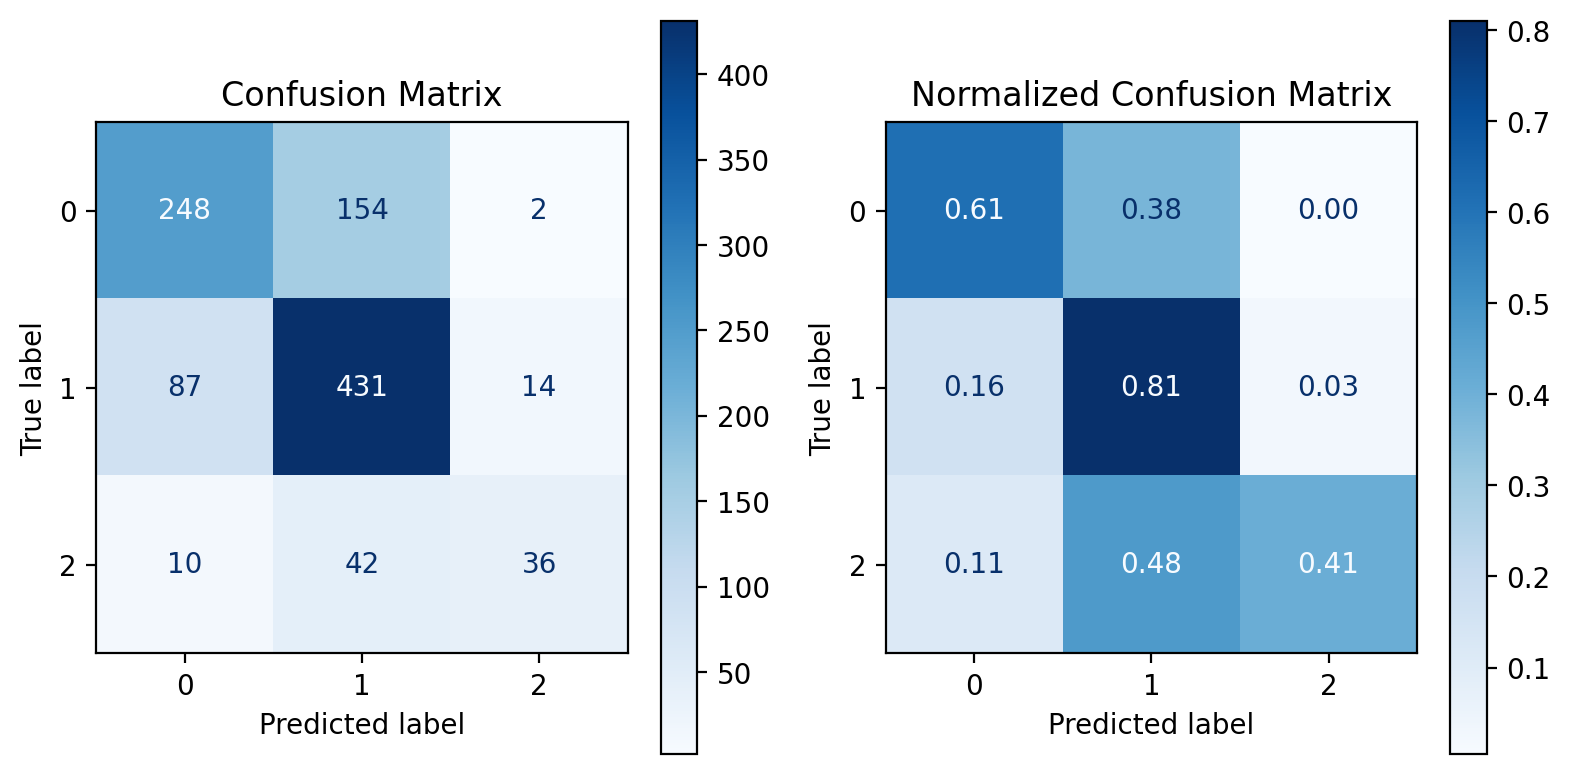

model 1
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       404
           1       0.69      0.79      0.74       532
           2       0.54      0.49      0.51        88

    accuracy                           0.68      1024
   macro avg       0.65      0.62      0.63      1024
weighted avg       0.69      0.68      0.68      1024



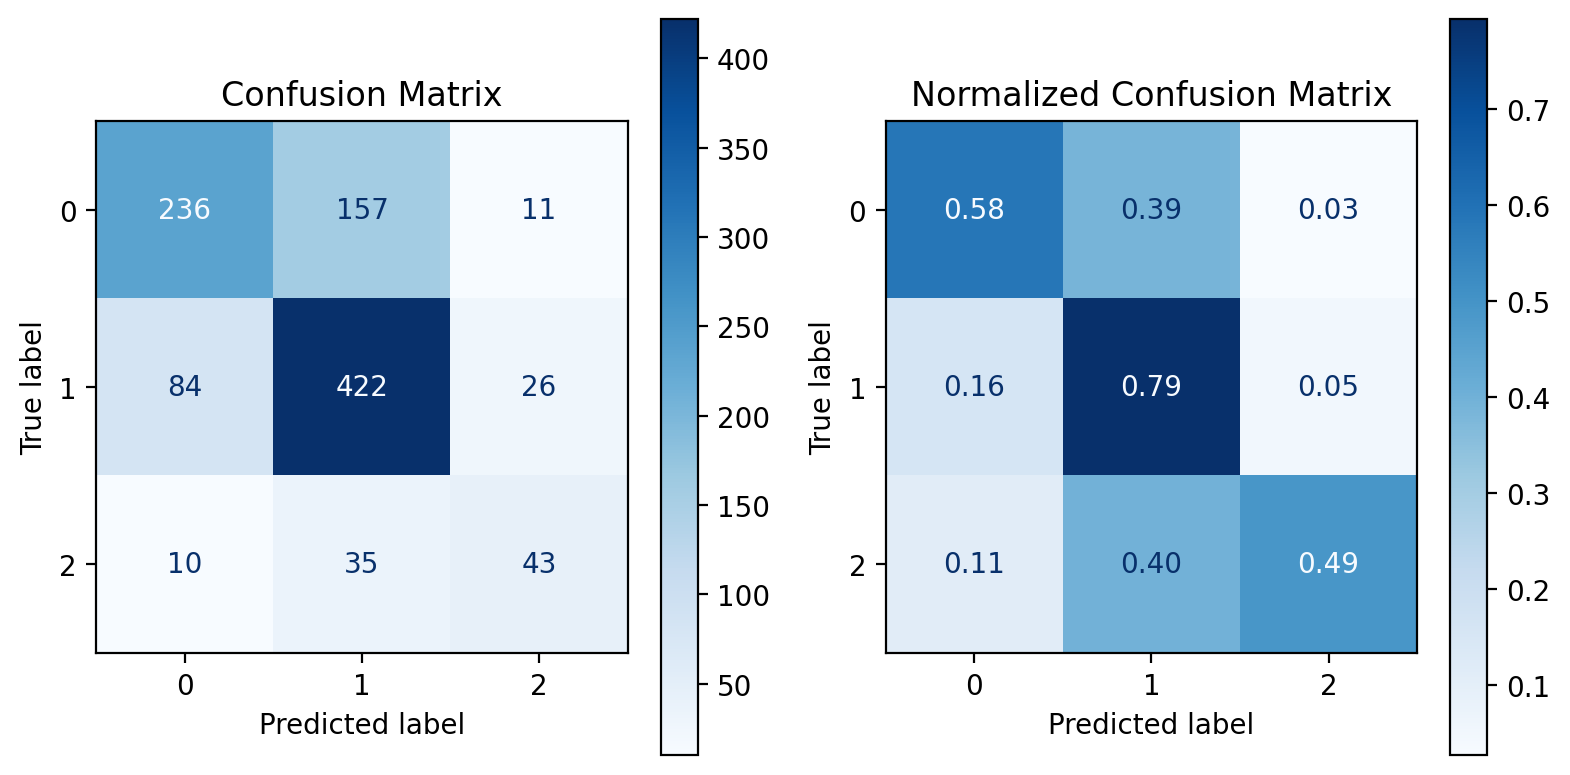

model 2
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       404
           1       0.90      0.93      0.91       532
           2       0.86      0.74      0.79        88

    accuracy                           0.90      1024
   macro avg       0.88      0.85      0.87      1024
weighted avg       0.90      0.90      0.89      1024



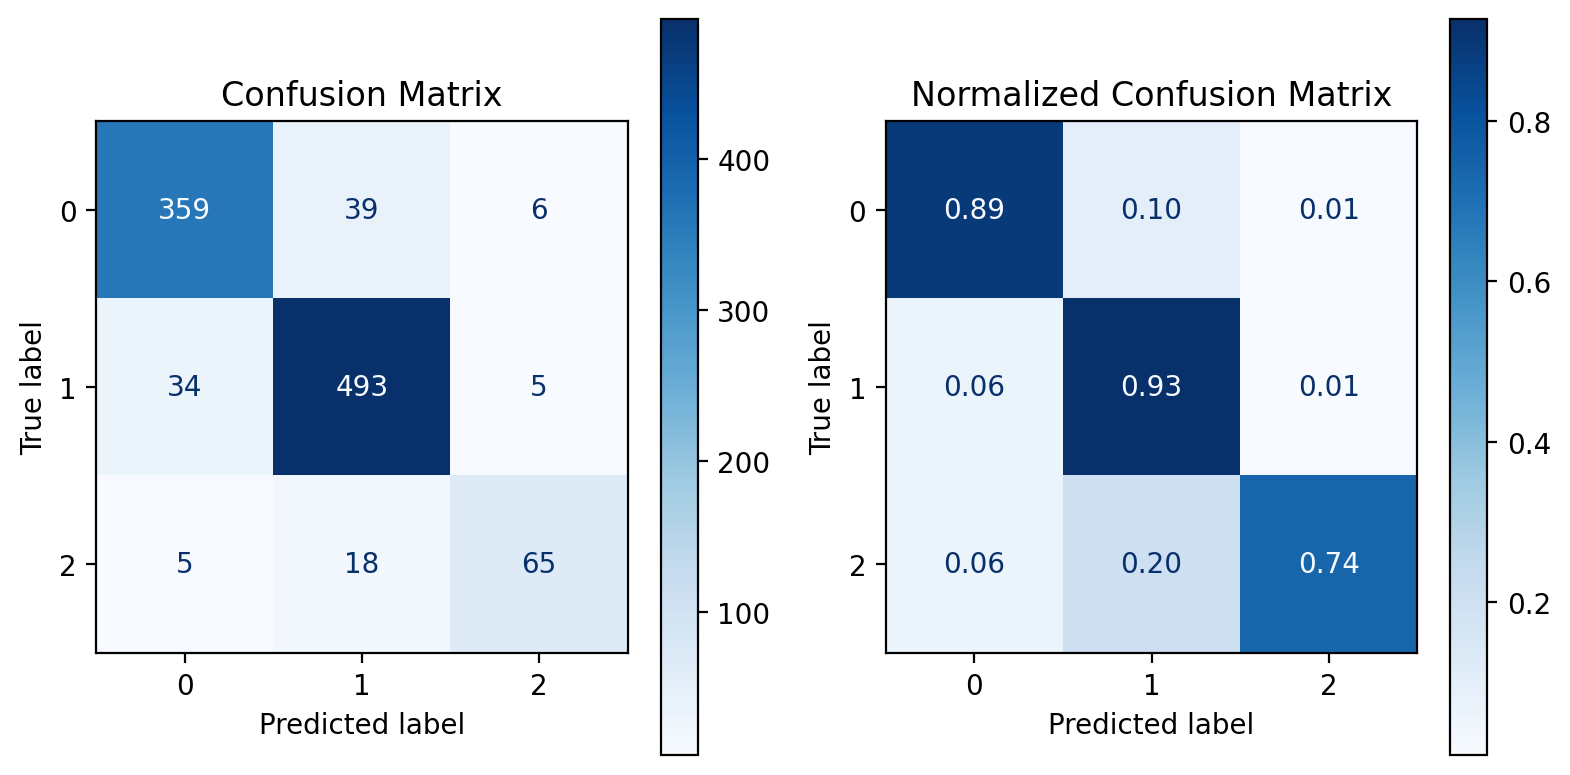

model 3
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       404
           1       0.90      0.93      0.91       532
           2       0.87      0.76      0.81        88

    accuracy                           0.90      1024
   macro avg       0.89      0.86      0.87      1024
weighted avg       0.90      0.90      0.90      1024



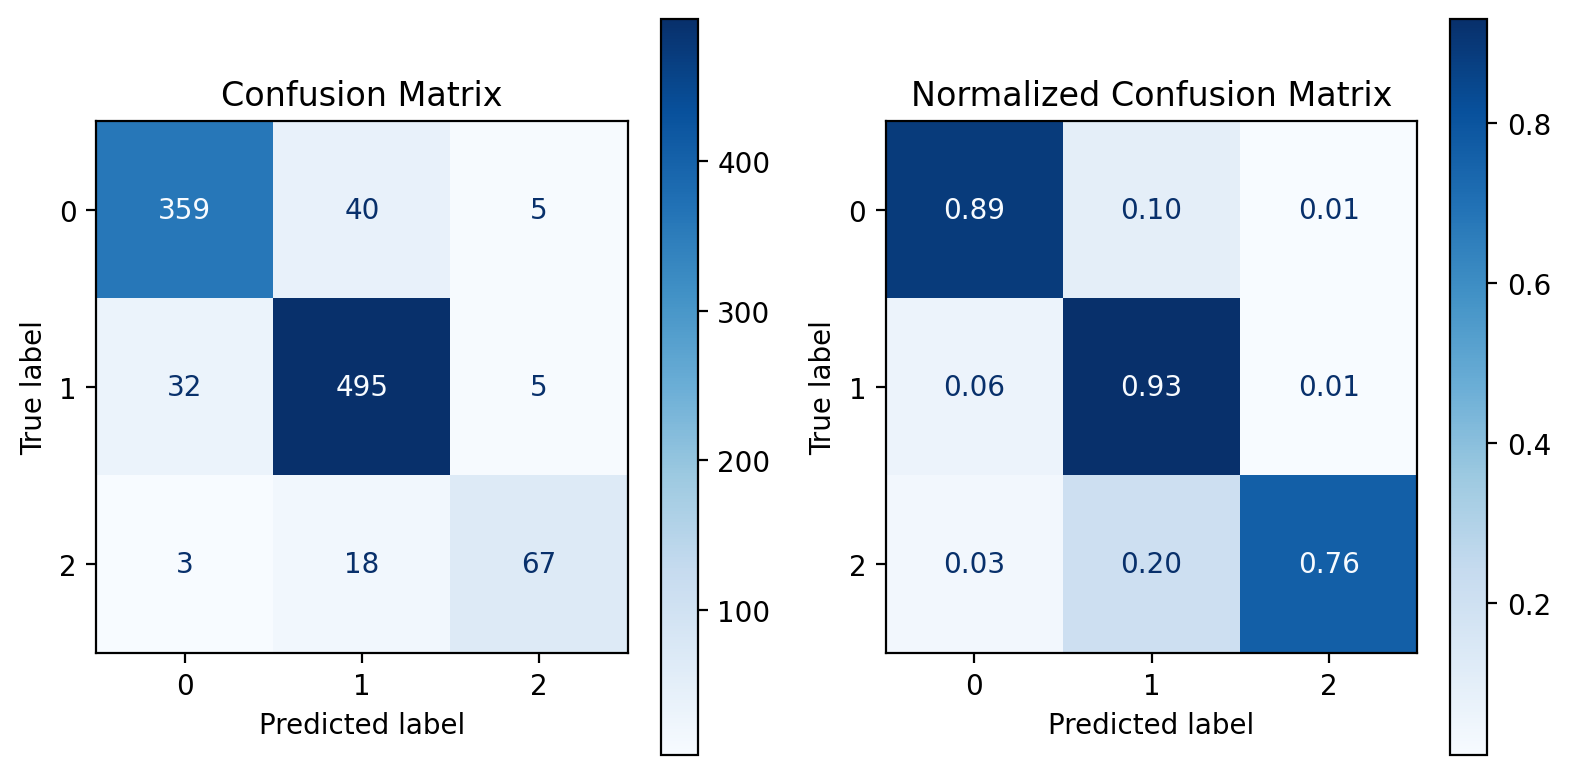

model 4
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       404
           1       0.90      0.93      0.92       532
           2       0.90      0.74      0.81        88

    accuracy                           0.90      1024
   macro avg       0.90      0.86      0.88      1024
weighted avg       0.90      0.90      0.90      1024



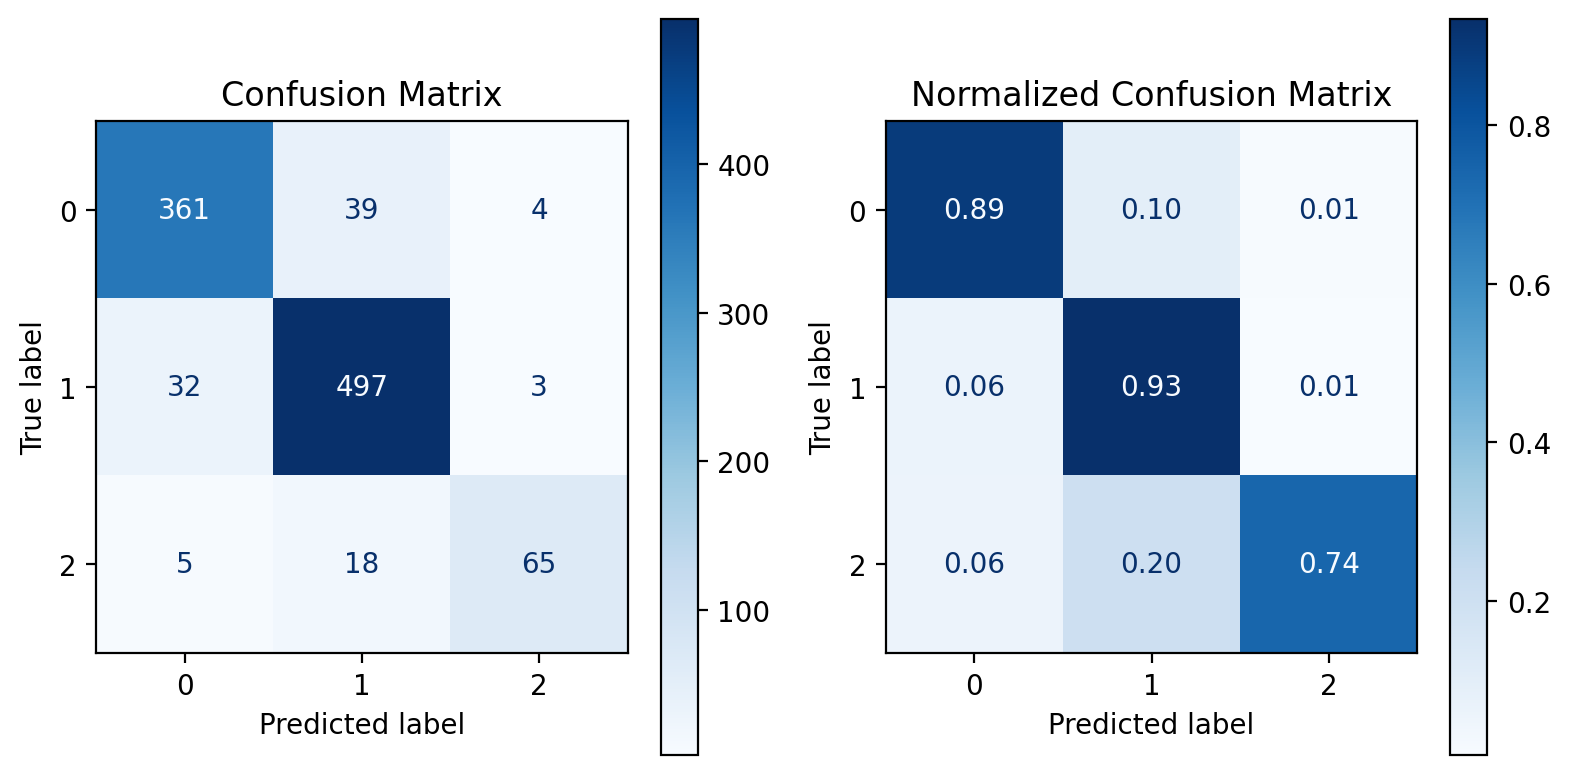

model 5
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       404
           1       0.90      0.93      0.92       532
           2       0.89      0.75      0.81        88

    accuracy                           0.90      1024
   macro avg       0.90      0.86      0.88      1024
weighted avg       0.90      0.90      0.90      1024



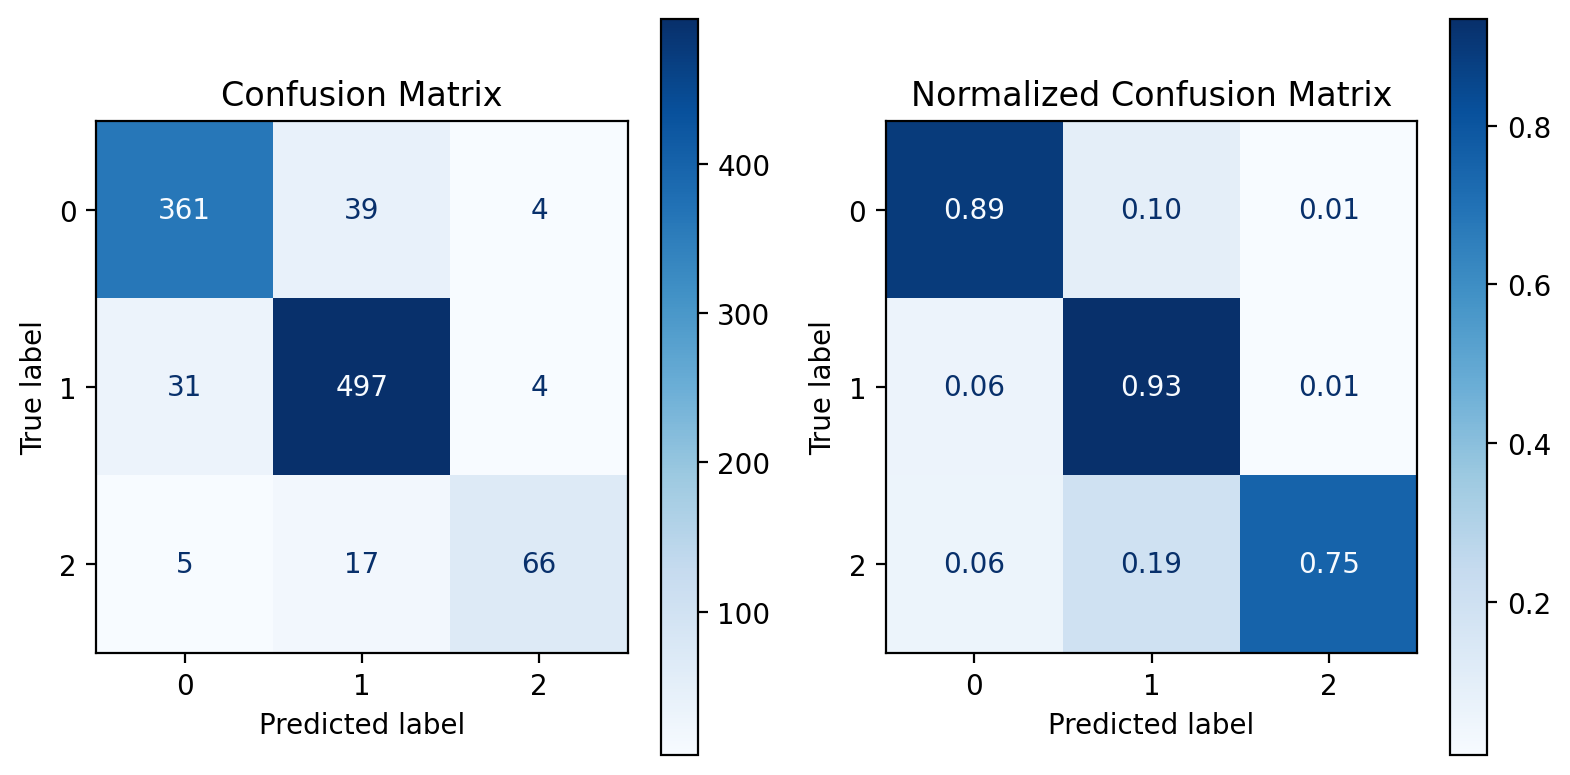

model 6
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       404
           1       0.89      0.94      0.92       532
           2       0.89      0.77      0.83        88

    accuracy                           0.90      1024
   macro avg       0.90      0.87      0.88      1024
weighted avg       0.90      0.90      0.90      1024



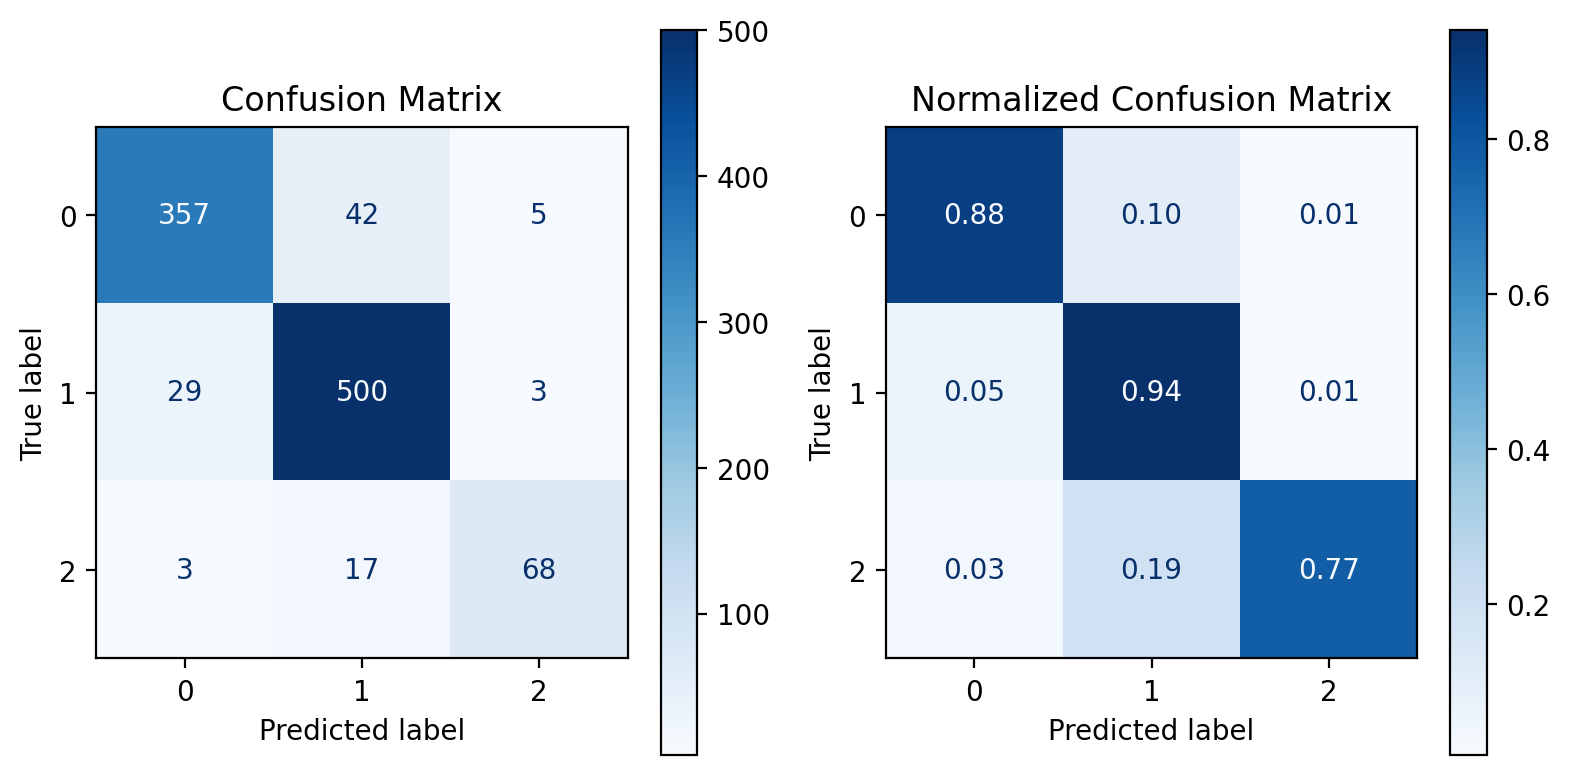

model 7
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       404
           1       0.77      0.87      0.82       532
           2       0.85      0.50      0.63        88

    accuracy                           0.79      1024
   macro avg       0.81      0.70      0.74      1024
weighted avg       0.79      0.79      0.78      1024



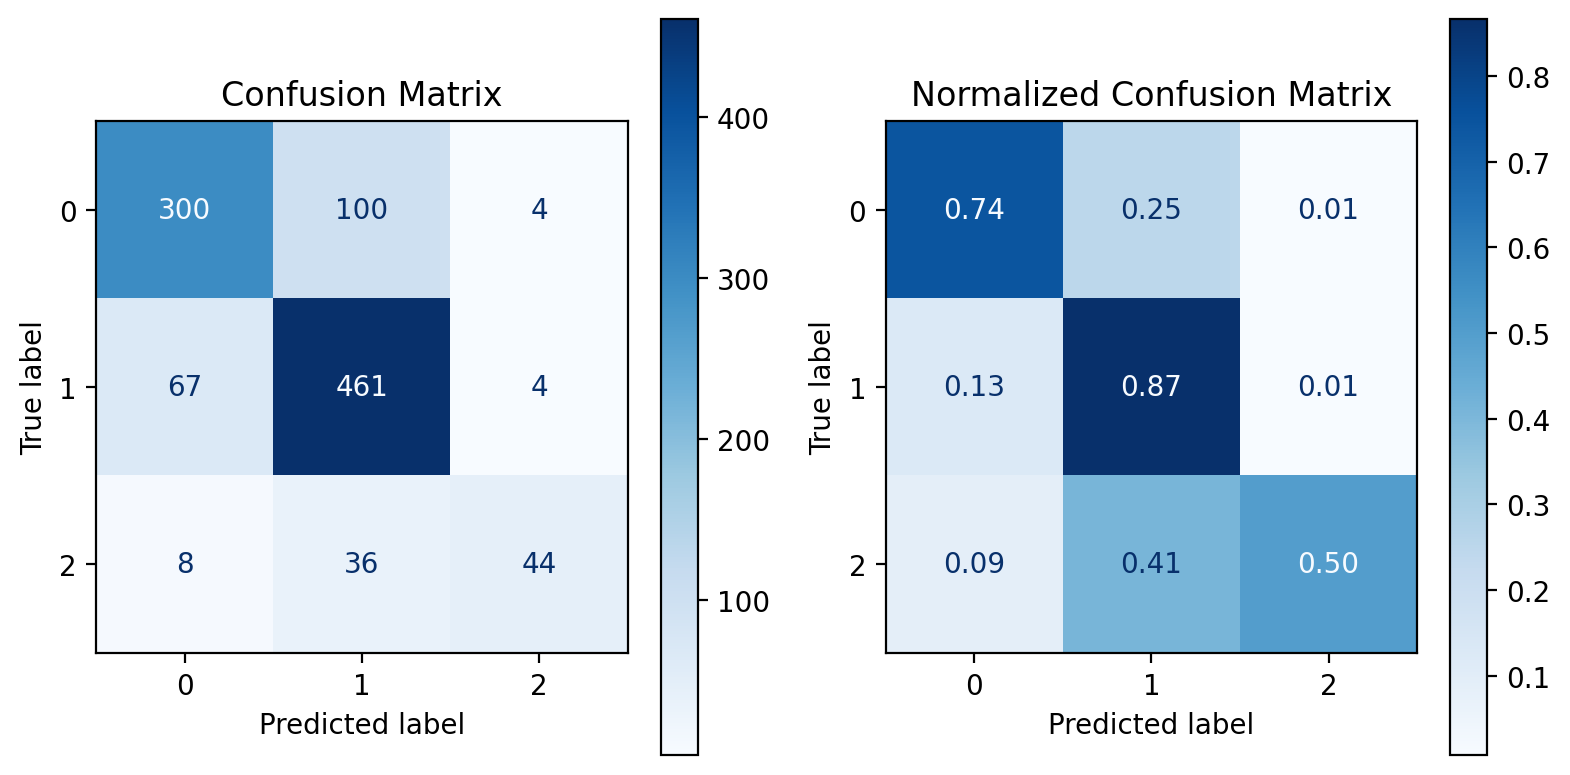

model 8
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       404
           1       0.79      0.86      0.82       532
           2       0.81      0.48      0.60        88

    accuracy                           0.80      1024
   macro avg       0.80      0.71      0.74      1024
weighted avg       0.80      0.80      0.79      1024



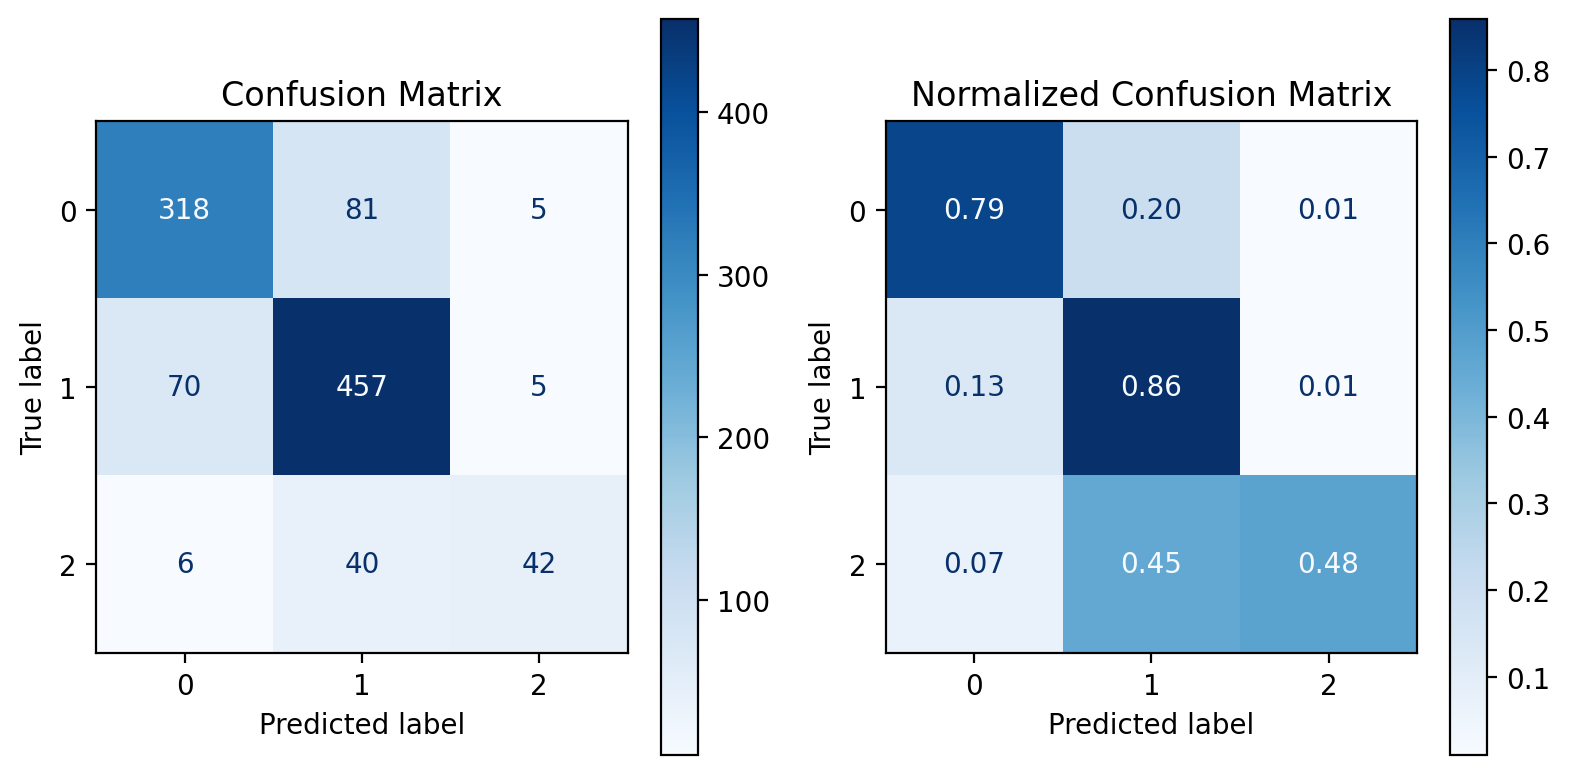

model 9
              precision    recall  f1-score   support

           0       0.69      0.57      0.62       404
           1       0.67      0.80      0.73       532
           2       0.63      0.43      0.51        88

    accuracy                           0.67      1024
   macro avg       0.66      0.60      0.62      1024
weighted avg       0.67      0.67      0.67      1024



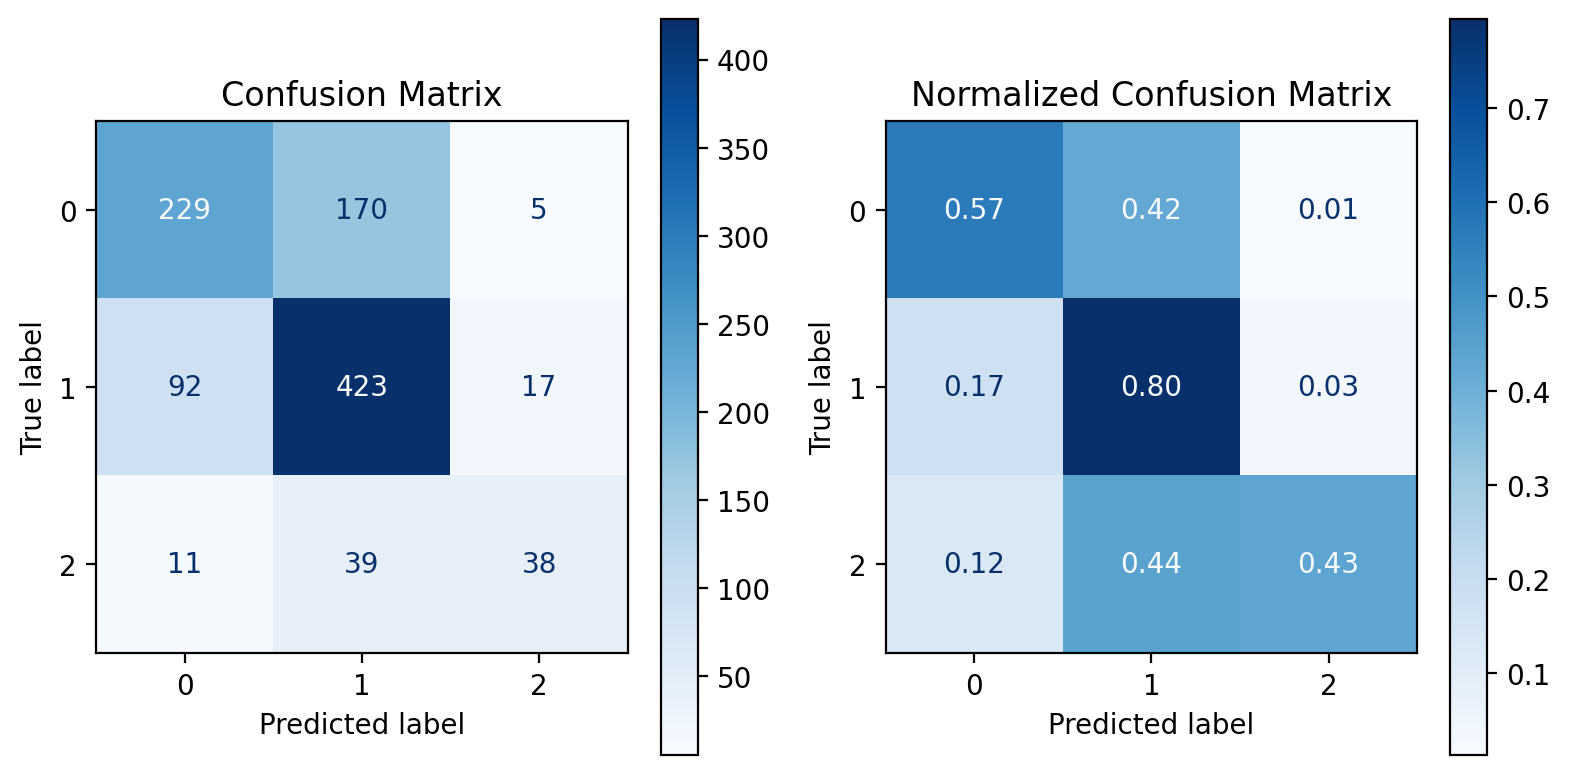

In [45]:
# evaluation
for i, oof in enumerate(list_oof_train):
    print(f"model {i}")
    evaluate_classification_model(oof, df_train['Adaptivity Level_encoded'])

### 4.4.3. Conclusion:
- I'll select CatBoost Model.

## 4.5. Training Final Model

In [46]:
# preprocess df_train
df_X = make_df_X(df_train, pipeline)

(1024, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
# fitting final model
model_final = CatBoostClassifier(silent = True, random_state = seed)
model_final.fit(df_X.to_numpy(), df_train['Adaptivity Level_encoded'].to_numpy())

# 5. Test

In [48]:
# preprocess df_test
df_test_X = make_df_X(df_test, pipeline)

(181, 35)


,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,Education Level_University,Institution Type_Government,Institution Type_Non Government,IT Student_No,IT Student_Yes,Location_No,Location_Yes,Load-shedding_High,Load-shedding_Low,Financial Condition_Mid,Financial Condition_Poor,Financial Condition_Rich,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
# prediction
pred_test = model_final.predict(df_test_X)

In [50]:
# encode test target
df_test['Adaptivity Level_encoded'] = df_test['Adaptivity Level'].apply(encode_adaptivity_level)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        76
           1       0.93      0.96      0.94        93
           2       0.90      0.75      0.82        12

    accuracy                           0.93       181
   macro avg       0.92      0.88      0.90       181
weighted avg       0.93      0.93      0.93       181



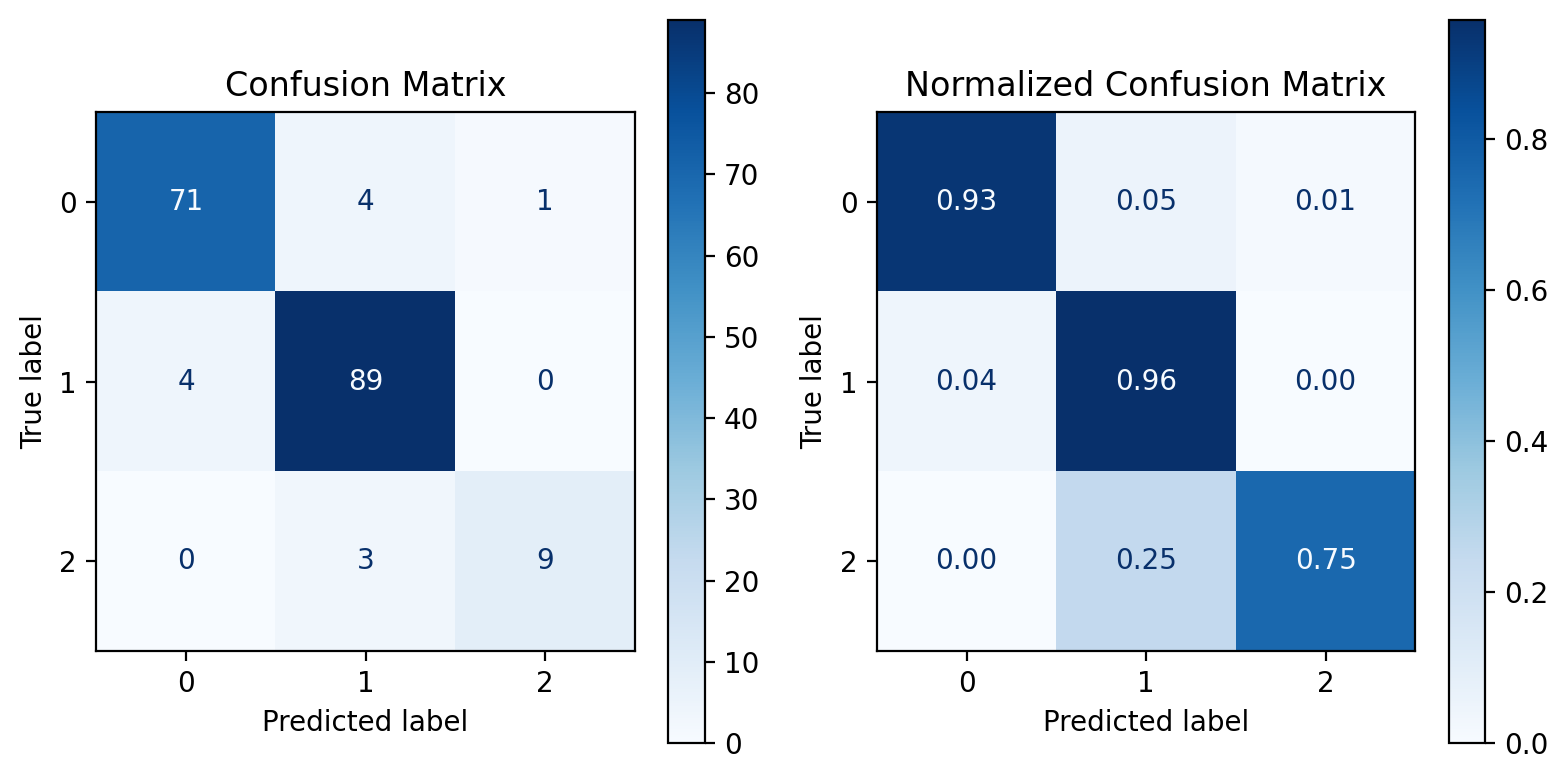

In [51]:
# final evaluation
evaluate_classification_model(pred_test, df_test['Adaptivity Level_encoded'])

### Conclusion:
- Final F1 Score: .93